# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1, inplace=True)

df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df["ENROLL_PREK"]+df["ENROLL_PRIMARY"]+df["ENROLL_HS"])
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

print("Data cleanup completed. Shape:", df.shape)

Data cleanup completed. Shape: (602, 25)


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [4]:
# @@@ 1
# Your Code
print("Number of years in dataset:", df['YEAR'].nunique())
print("Year range:", df['YEAR'].min(), "to", df['YEAR'].max())
print("Years available:", sorted(df['YEAR'].unique())) 
df_2011 = df[df['YEAR'] == 2011].copy()
df_2011 = df_2011[df_2011['STATE'] != 'United States']
df_2011 = df_2011[['STATE', 'AVG_MATH_8_SCORE']]
df_2011 = df_2011.set_index('STATE')
df_2011 = df_2011.sort_values(by='AVG_MATH_8_SCORE', ascending=False)


Number of years in dataset: 13
Year range: 1990 to 2019
Years available: [np.int64(1990), np.int64(1992), np.int64(1996), np.int64(2000), np.int64(2003), np.int64(2005), np.int64(2007), np.int64(2009), np.int64(2011), np.int64(2013), np.int64(2015), np.int64(2017), np.int64(2019)]


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [5]:
# @@@ 2


mi_avg = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE'].mean()
oh_avg = df[df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].mean()

print(f"Michigan average Grade 8 Math score across all years: {mi_avg:.2f}")
print(f"Ohio average Grade 8 Math score across all years: {oh_avg:.2f}")
print(f"Difference (Ohio - Michigan): {oh_avg - mi_avg:.2f}")

if oh_avg > mi_avg:
    print("Ohio has higher average Grade 8 Math scores")
else:
    print("Michigan has higher average Grade 8 Math scores")



Michigan average Grade 8 Math score across all years: 276.17
Ohio average Grade 8 Math score across all years: 282.25
Difference (Ohio - Michigan): 6.08
Ohio has higher average Grade 8 Math scores


Find the average for your chosen test across all states in 2019

In [6]:
# @@@ 3

avg_2019 = df[df['YEAR'] == 2019]['AVG_MATH_8_SCORE'].mean()

df_2019 = df[df['YEAR'] == 2019][['STATE', 'AVG_MATH_8_SCORE']].sort_values('AVG_MATH_8_SCORE', ascending=False)
print("2019 Analysis Results:")
print(f"Average Grade 8 Math score across all states in 2019: {avg_2019:.2f}")
print("\nGrade 8 Math scores by state in 2019:")
print(df_2019.head(50))#to print 50 states

2019 Analysis Results:
Average Grade 8 Math score across all states in 2019: 281.26

Grade 8 Math scores by state in 2019:
               STATE  AVG_MATH_8_SCORE
1684   MASSACHUSETTS             294.0
1694      NEW_JERSEY             292.0
1671           DODEA             292.0
1686       MINNESOTA             291.0
1713       WISCONSIN             289.0
1710        VIRGINIA             287.0
1693   NEW_HAMPSHIRE             287.0
1709         VERMONT             287.0
1705    SOUTH_DAKOTA             287.0
1714         WYOMING             286.0
1677         INDIANA             286.0
1698    NORTH_DAKOTA             286.0
1675           IDAHO             286.0
1699            OHIO             286.0
1668     CONNECTICUT             286.0
1711      WASHINGTON             286.0
1702    PENNSYLVANIA             285.0
1708            UTAH             285.0
1667        COLORADO             285.0
1691        NEBRASKA             285.0
1689         MONTANA             284.0
1697  NORTH_CAROLIN

For each state, find a maximum value for your chosen test score

In [7]:
# @@@ 4
state_max_scores = df.groupby('STATE')['AVG_MATH_8_SCORE'].max().sort_values(ascending=False)

max_score_idx = df['AVG_MATH_8_SCORE'].idxmax()
max_score_row = df.loc[max_score_idx]
print("Maximum Grade 8 Math Scores Analysis:")
print("Maximum Grade 8 Math scores by state:")
print(state_max_scores.head(50))#for 50 states

print(f"\nHighest Grade 8 Math score overall: {max_score_row['AVG_MATH_8_SCORE']:.2f}")
print(f"State: {max_score_row['STATE']}")
print(f"Year: {max_score_row['YEAR']}")

Maximum Grade 8 Math Scores Analysis:
Maximum Grade 8 Math scores by state:
STATE
MASSACHUSETTS     301.0
NEW_JERSEY        296.0
NEW_HAMPSHIRE     296.0
VERMONT           295.0
MINNESOTA         295.0
NORTH_DAKOTA      293.0
DODEA             293.0
MONTANA           293.0
COLORADO          292.0
SOUTH_DAKOTA      291.0
TEXAS             290.0
WASHINGTON        290.0
VIRGINIA          290.0
KANSAS            290.0
PENNSYLVANIA      290.0
OHIO              290.0
WYOMING           289.0
CONNECTICUT       289.0
WISCONSIN         289.0
MAINE             289.0
MARYLAND          288.0
NEBRASKA          288.0
INDIANA           288.0
UTAH              287.0
IDAHO             287.0
NORTH_CAROLINA    286.0
MISSOURI          286.0
IOWA              286.0
NATIONAL          285.0
ILLINOIS          285.0
OREGON            285.0
DELAWARE          284.0
RHODE_ISLAND      284.0
ALASKA            283.0
ARIZONA           283.0
NEW_YORK          283.0
SOUTH_CAROLINA    282.0
KENTUCKY          282.0
FLORID

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
# @@@ 5
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']

# Create revenue per student feature
df['TOTAL_REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL_ALL']

# Create ratio features that might be more meaningful than absolute values
df['INSTRUCTION_EXPENDITURE_RATIO'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']
df['SUPPORT_SERVICES_EXPENDITURE_RATIO'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['TOTAL_EXPENDITURE']

# Create enrollment size categories (small, medium, large)
df['ENROLLMENT_SIZE'] = pd.cut(df['ENROLL_ALL'], 
                               bins=[0, 500000, 1000000, float('inf')], 
                               labels=['Small', 'Medium', 'Large'])



Feature engineering justification: **<I created per student features to normalize for state size differences, since larger states spend more. I also created ratio features to understand spending priorties. The enrollemnt size categories help capture potential econonmies of scale effects and see how that impacts.  \>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

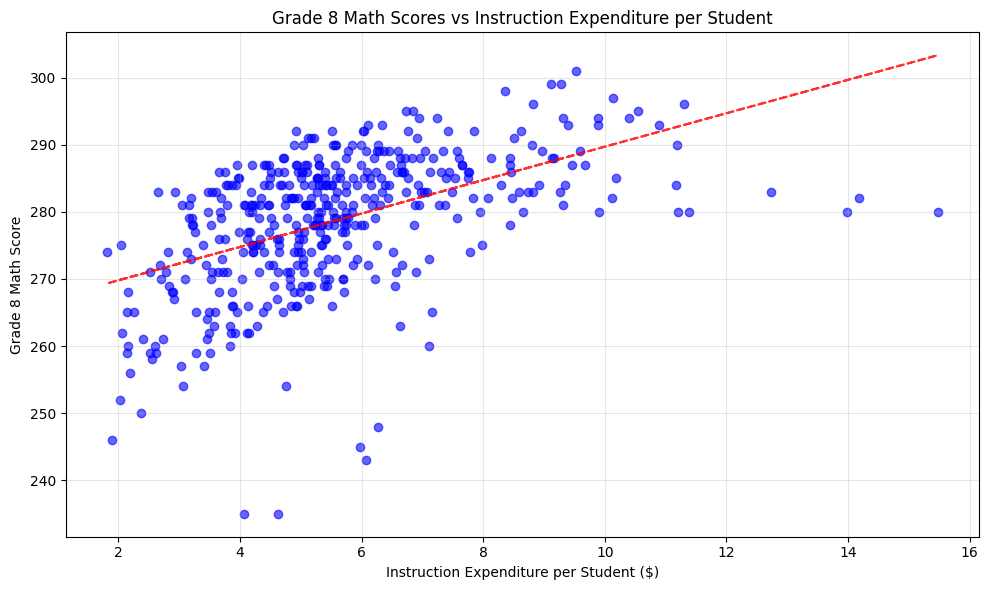

In [9]:
# @@@ 6
plt.figure(figsize=(10, 6))
plt.scatter(df['INSTRUCTION_EXPENDITURE_PER_STUDENT'], df['AVG_MATH_8_SCORE'], alpha=0.6, color='blue')
plt.xlabel('Instruction Expenditure per Student ($)')
plt.ylabel('Grade 8 Math Score')
plt.title('Grade 8 Math Scores vs Instruction Expenditure per Student')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['INSTRUCTION_EXPENDITURE_PER_STUDENT'].dropna(), 
               df.loc[df['INSTRUCTION_EXPENDITURE_PER_STUDENT'].dropna().index, 'AVG_MATH_8_SCORE'], 1)
p = np.poly1d(z)
plt.plot(df['INSTRUCTION_EXPENDITURE_PER_STUDENT'].dropna(), 
         p(df['INSTRUCTION_EXPENDITURE_PER_STUDENT'].dropna()), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

**The scatter plot shows that states spending more per student on instruction tend to have higher Grade 8 math scores. However, the points are widely spread, meaning spending is only one factor among many that affect performance.**

**Visualization 2**

/var/folders/7w/wkkwzl092vn85qyvk0yy12z00000gn/T/ipykernel_67824/2655991083.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = df.groupby(['YEAR', 'ENROLLMENT_SIZE'])['AVG_MATH_8_SCORE'].mean().unstack()


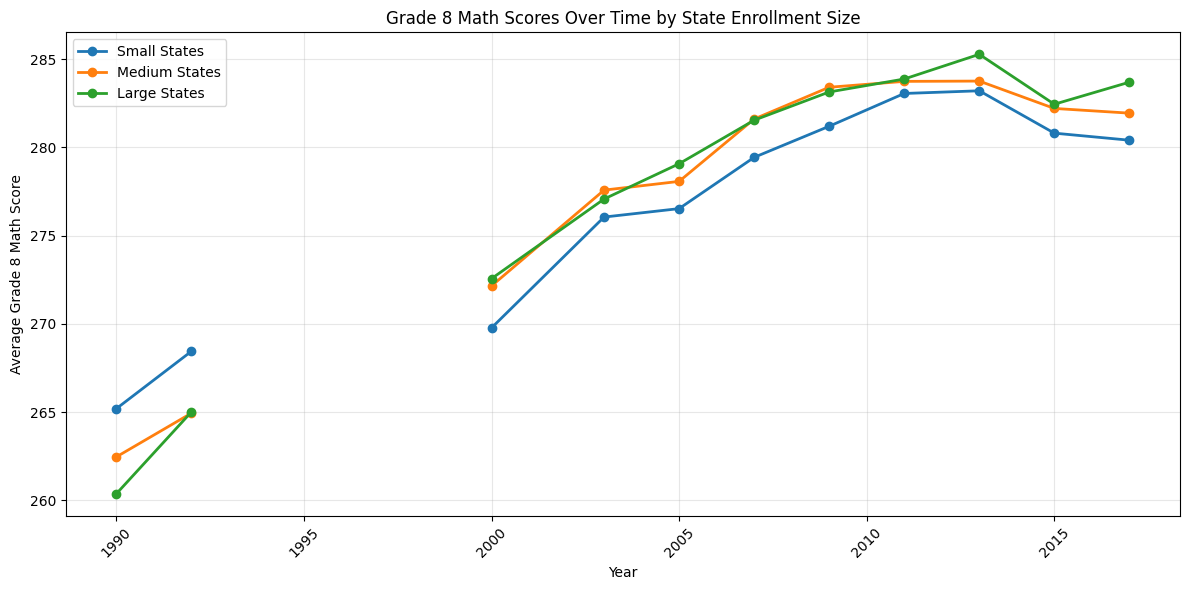

In [10]:
# @@@ 7
plt.figure(figsize=(12, 6))

# Create a pivot table for easier plotting
pivot_data = df.groupby(['YEAR', 'ENROLLMENT_SIZE'])['AVG_MATH_8_SCORE'].mean().unstack()

# Plot lines for each enrollment size category
for category in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[category], marker='o', label=f'{category} States', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Average Grade 8 Math Score')
plt.title('Grade 8 Math Scores Over Time by State Enrollment Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**This chart shows Grade 8 math scores over time by state size. Scores went up for all groups from 1990 to about 2013. Large states usually had the highest scores. After 2013, scores leveled off or dropped a little. Overall, all state size categroies show a genereal upward trend in math scores over time, with some year to year fluncations.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# @@@ 8

# X =
# y = 
feature_columns = [
    'INSTRUCTION_EXPENDITURE_PER_STUDENT',
    'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', 
    'TOTAL_EXPENDITURE_PER_STUDENT',
    'TOTAL_REVENUE_PER_STUDENT',
    'INSTRUCTION_EXPENDITURE_RATIO',
    'SUPPORT_SERVICES_EXPENDITURE_RATIO',
    'ENROLL_8',
    'AVG_READING_4_SCORE',  
    'AVG_MATH_4_SCORE'      
]

X = df[feature_columns].copy()
y = df['AVG_MATH_8_SCORE'].copy()

mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Features used: {list(X.columns)}") 

Feature matrix shape: (399, 9)
Target variable shape: (399,)
Features used: ['INSTRUCTION_EXPENDITURE_PER_STUDENT', 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', 'TOTAL_EXPENDITURE_PER_STUDENT', 'TOTAL_REVENUE_PER_STUDENT', 'INSTRUCTION_EXPENDITURE_RATIO', 'SUPPORT_SERVICES_EXPENDITURE_RATIO', 'ENROLL_8', 'AVG_READING_4_SCORE', 'AVG_MATH_4_SCORE']


In [13]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set features: {X_train.shape[1]} features")

Training set size: 279 samples
Testing set size: 120 samples
Training set features: 9 features


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [14]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
# @@@ 11
# create your model here
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)

print("Model created: Random Forest Regressor")
print(f"Model parameters: n_estimators=100, max_depth=10, random_state=42") 

Model created: Random Forest Regressor
Model parameters: n_estimators=100, max_depth=10, random_state=42


In [18]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [20]:
# @@@ 12
# Training metrics
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

# Testing metrics
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print("Model Performance Evaluation:")
print("=" * 50)
print("Training Set:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE: {train_mae:.2f}")
print()
print("Testing Set:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE: {test_mae:.2f}")
print()
print("Feature Importance (Top 5):")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance.head())

Model Performance Evaluation:
Training Set:
  R² Score: 0.9792
  RMSE: 1.29
  MAE: 1.06

Testing Set:
  R² Score: 0.9116
  RMSE: 3.34
  MAE: 2.60

Feature Importance (Top 5):
                              feature  importance
8                    AVG_MATH_4_SCORE    0.830423
7                 AVG_READING_4_SCORE    0.057400
6                            ENROLL_8    0.028376
4       INSTRUCTION_EXPENDITURE_RATIO    0.020886
5  SUPPORT_SERVICES_EXPENDITURE_RATIO    0.016484


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

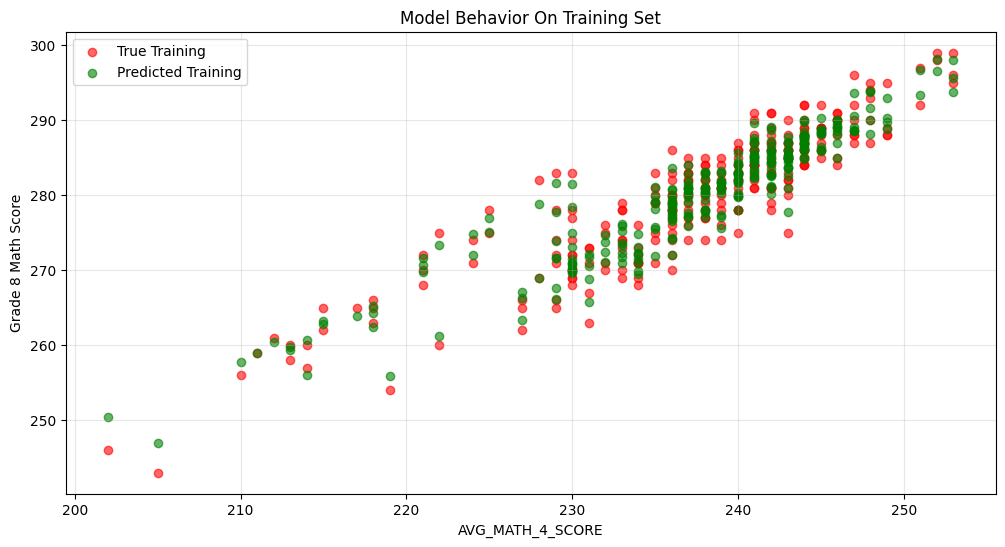

In [21]:
# @@@ 13

col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red", alpha=0.6, label='True Training')
plt.scatter(X_train[col_name], model.predict(X_train), color = "green", alpha=0.6, label='Predicted Training')

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Grade 8 Math Score')
plt.title("Model Behavior On Training Set")
plt.grid(True, alpha=0.3)
plt.show()

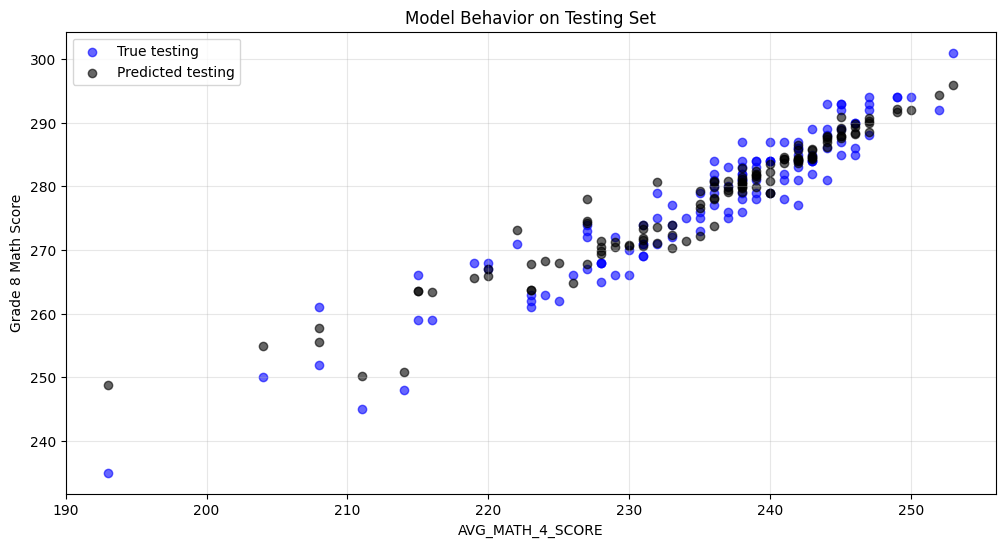

In [22]:
# @@@ 14


col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue", alpha=0.6, label='True Testing')
plt.scatter(X_test[col_name], model.predict(X_test), color = "black", alpha=0.6, label='Predicted Testing')

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Grade 8 Math Score')
plt.title("Model Behavior on Testing Set")
plt.grid(True, alpha=0.3)
plt.show()